In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tickets_df = pd.read_excel('/content/drive/MyDrive/Capstone Project/input_data.xlsx')
tickets_df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [4]:
tickets_df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [5]:
## basic info
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [6]:
## Shape
tickets_df.shape

(8500, 4)

In [7]:
tickets_df.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [8]:
(tickets_df.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [9]:
#tickets_df = tickets_df.astype(str)
convert_dict = {
    'Short description':str,
    'Description':str,
    'Caller':str,
    'Assignment group':str,
}
tickets_df = tickets_df.astype(convert_dict)

In [10]:
tickets_df["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [11]:
tickets_df["Assignment group"].nunique()

74

In [12]:
## find nulls
tickets_df[tickets_df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group


In [13]:
# drop nulls
tickets_df.dropna(inplace=True)
tickets_df.shape

(8500, 4)

In [14]:
## Duplicates 
sub_tickets_df = tickets_df[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = sub_tickets_df[sub_tickets_df.duplicated()]
duplicateRowsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [15]:
# Remove Duplicates
tickets_df_upd = tickets_df.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [16]:
## Group by Categories
tickets_df_grp = tickets_df_upd.groupby(['Assignment group']).size().reset_index(name='counts')
tickets_df_grp

,Assignment group,counts
0,GRP_0,3934
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


In [17]:
tickets_df_grp.describe()

,counts
count,74.000000
mean,113.743243
std,460.731077
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3934.000000


In [18]:
# Total number of words in the corpus
tickets_df['RawDescription'] = tickets_df['Short description'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [19]:
tickets_df['RawWordCount'] = [len(desc.split(' ')) for desc in tickets_df['RawDescription']]
tickets_df.head()
wordCount_before = tickets_df['RawWordCount'].sum()

In [20]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  307607


Visualization

Word Clould of "Short descrition" Column

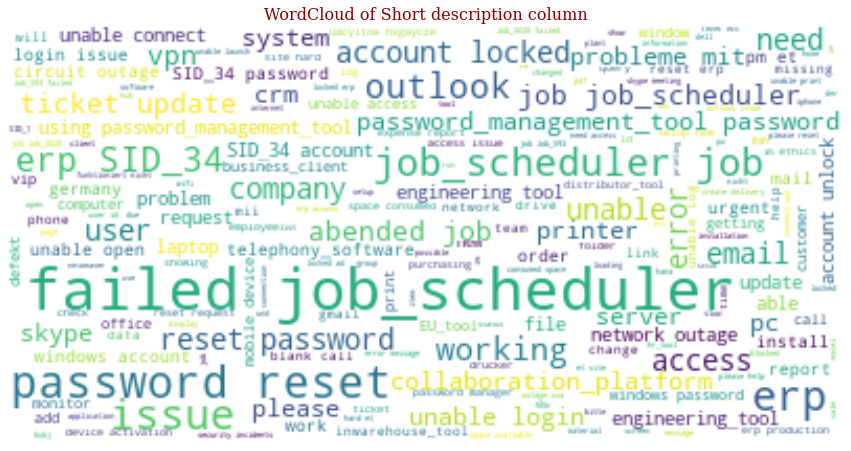

In [21]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Short description'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word Cloud of raw "Description" Column

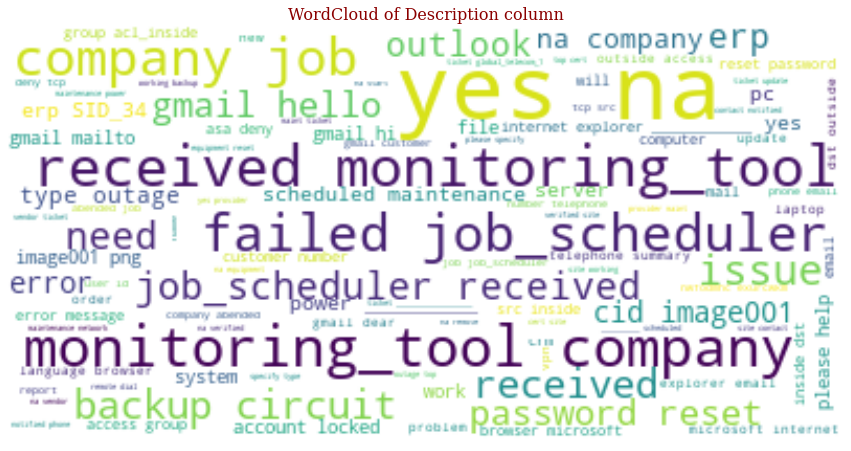

In [22]:
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word Cloud of raw "Description" Column

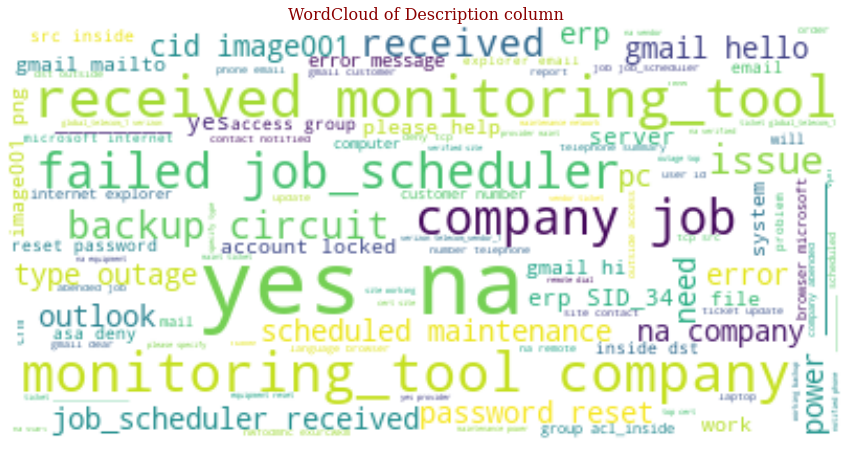

In [23]:
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word Cloud of complete raw data of the Corpus - "RawDescription"

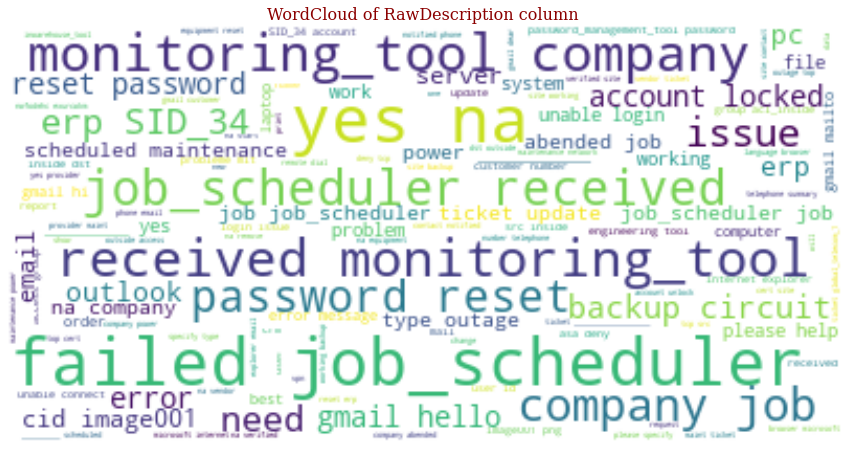

In [24]:
All_words = ""
All_words += " ".join(tickets_df.RawDescription)
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of RawDescription column ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud of Callers

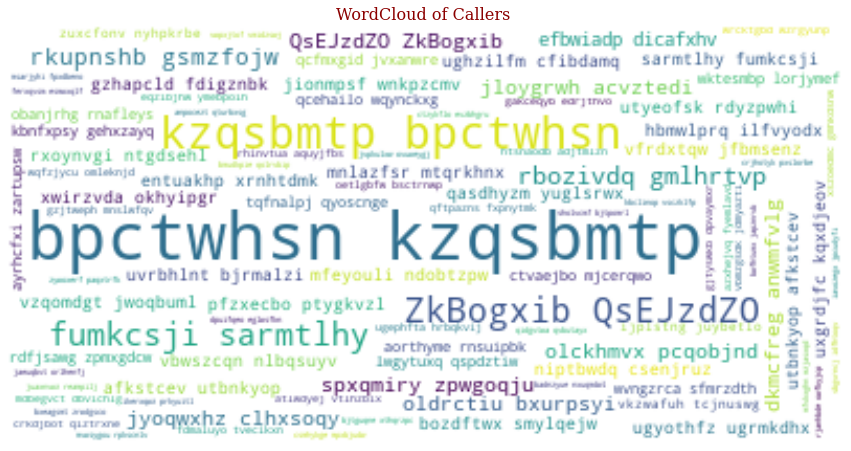

In [25]:
all_callers = ""
all_callers += " ".join(tickets_df.Caller)
wordcloud = WordCloud(background_color='white').generate(all_callers) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Callers ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

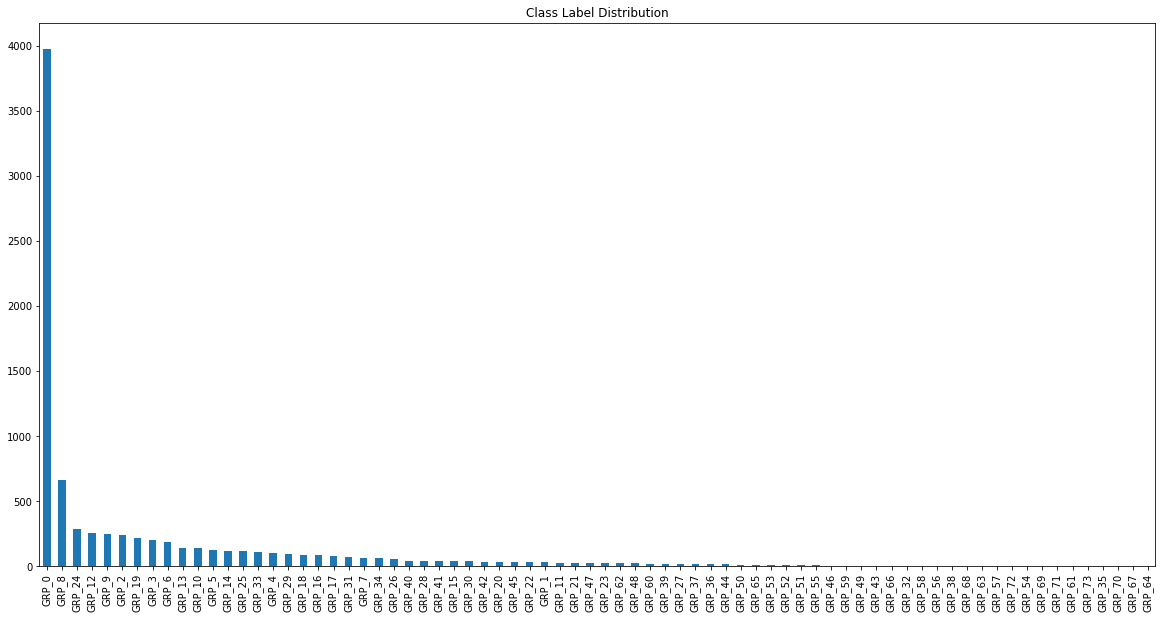

In [26]:
tickets_df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

In [27]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

Text Pre-Processing

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [31]:
#Remove numbers
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text


#Replace Contractions

contraction_patterns = [ (r'won\'t', 'will not'),(r'didn\'t', 'did not'),(r'didnt', 'did not'), (r'can\'t', 'cannot'),(r'cant', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text
'''
def replaceContraction(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
'''

#Replace Negations with Antonym
def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())
    if len(antonyms) == 1:
        return antonyms.pop()
    else:
        return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
        word = text[i]
        if word == 'not' and i+1 < l:
            ant = replace(text[i+1])
            if ant:
                words.append(ant)
                i += 2
                continue
        words.append(word)
        i += 1
    return words

def antonym(text):
    tokens = nltk.word_tokenize(text)
    tokens = replaceNegations(tokens)
    text = " ".join(tokens)
    return text


#Remove Stopwords
stoplist = stopwords.words('english')
stoplist.remove('no')
stoplist.remove('not')
def stp_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in stoplist):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

#Remove mail related words
mail_words_list = ['hi','hello','com','gmail','cc','regards','thanks']
def mail_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in mail_words_list):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

#Lemmatization
stemmer = PorterStemmer() #set stemmer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#Remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

AttributeError: ignored